In [1]:
# PYTHON LIBRARIES
%matplotlib inline

import math
import numpy as np
np.seterr(divide='ignore', invalid='ignore')
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.set()

from matplotlib import cm
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
number = LabelEncoder()
from statsmodels.stats.outliers_influence import summary_table
from adjustText import adjust_text
from collections import OrderedDict

# Adjust css for usability
from IPython.core.display import HTML
HTML('''
<style type="text/css">

.jp-RenderedHTMLCommon table {
    table-layout: auto;
    border-collapse: collapse;
    width: 75%;
}

.jp-RenderedHTMLCommon table .absorbing-column {
    width: 75%;
}

</style>
''')

# CONSTANTS

markerSymbol = [
    "o", #circle
    "v", #triangle_down
    "^", #triangle_up
    "<", #triangle_left
    ">", #triangle_right
#     "s", #square
    "p", #pentagon
    "P", #plus (filled)
    "*", #star
    "H", #hexagon2
    "X", #x (filled)
    "D", #diamond
    "d", #thin_diamond
    "1", #tri_down
    "2", #tri_up
    "3", #tri_left
    "4", #tri_right
    "+", #plus
    "x"  #x
];

markerColour = [
    '#b71c1c', #red darken-4
    '#1a237e', #indigo darken-4
#     '#004d40', #teal darken-4
#     '#f57f17', #yellow darken-4
#     '#1b5e20', #green darken-4
#     '#3e2723', #brown darken-4    
    '#4a148c', #purple darken-4
#     '#01579b', #light-blue darken-4
    '#33691e', #light-green darken-4
#     '#e65100', #orange darken-4
#     '#263238', #blue-grey darken-4
#     '#880e4f', #pink darken-4
#     '#0d47a1', #blue darken-4
#     '#ff6f00', #amber darken-4
#     '#212121', #grey darken-4
#     '#311b92', #deep-purple darken-4
    '#006064', #cyan darken-4
#     '#827717', #lime darken-4
#     '#bf360c'  #deep-orange darken-4
    
#     '#9e9e9e', #grey
    '#e91e63', #pink
    '#9c27b0', #purple
    '#673ab7', #deep-purple
    '#3f51b5', #indigo
    '#2196f3', #blue
#     '#03a9f4', #light-blue
    '#00bcd4', #cyan
#     '#009688', #teal
    '#4caf50', #green
#     '#8bc34a', #light-green
#     '#cddc39', #lime
#     '#ffeb3b', #yellow
    '#ffc107', #amber
    '#ff9800', #orange
    '#ff5722', #deep-orange
    '#795548', #brown
    '#f44336'  #red
];

## Function to scatter plot

In [2]:
# GET THE MAGNITUDE ORDER OF A NUMBER
def magnitude(value):
    try:
        return 10**(int(math.floor(math.log10(abs(value)))))
    except:
        return 0
    
# min val in array w/empty array fix
def cmin(value):
    try:
        return np.nanmin(value)
    except:
        return float('NaN')
    
def cmax(value):
    try:
        return np.nanmax(value)
    except:
        return float('NaN')

In [3]:
# # SIMPLE SCATTER PLOT OF TWO VARIABLES
# def scatterPlot(x_str, x_units, y_str, y_units, df, fig_name):
#     # PLOT FIG
#     scale = 6;
#     fig, ax = plt.subplots(figsize=(3*scale, 2*scale));

#     # sort values by the independent variable
#     df_x = df.sort_values(by=[x_str])
#     # remove NANs from both variables and store them
#     df_x = df_x.dropna(subset=[x_str, y_str])
#     x = df_x.iloc[:][x_str]
#     y = df_x.iloc[:][y_str]

#     # Plot
#     plt.scatter(x, y, s=25)
    
#     # Display plots
#     plt.yscale('linear');
#     plt.xlabel(x_str + '    ' + x_units, fontsize=24);
#     plt.ylabel(y_str + '    ' + y_units, fontsize=24);
#     plt.title(fig_name, size=24);
#     #plt.legend(prop={'size': 18});
#     #plt.ticklabel_format(axis='both', style='sci', scilimits=(-2,2))
#     plt.show();

In [74]:
# SCATTER PLOT WITH AXIS-BREAK AND REFERENCE ANNOTATIONS
def scatterPlot_breakAxis(x_str, y_str, refLabels, logScale, df, df_x, color_by, legloc='best'):
    ''' <required> x_str          : x-axis name. Must match a column name within df and df_x
        
        <required> y_str          : y-axis name. Must match a column name within df and df_x
        
        <required> df             : raw dataframe structure usually obtained from a CSV file
        
        <required> df_x           : Same as df, but string values shall be replaced with some
                                    representative integer values
                                
        <optional> legloc='best'  : Specifies the legend box location. It can be:
                                    |-------------------+---------------|
                                    | Location String   | Location Code |
                                    |-------------------+---------------|
                                    | 'best'            |  0            |
                                    | 'upper right'     |  1            |
                                    | 'upper left'      |  2            |
                                    | 'lower left'      |  3            |
                                    | 'lower right'     |  4            |
                                    | 'right'           |  5            |
                                    | 'center left'     |  6            |
                                    | 'center right'    |  7            |
                                    | 'lower center'    |  8            |
                                    | 'upper center'    |  9            |
                                    | 'center'          | 10            |
                                    |-------------------+---------------|'''
    
    # GET THE X Y VALUES
    # remove NANs from both variables and store them
    df_str = df.dropna(subset=[x_str, y_str]);
    df_num = df_x.dropna(subset=[x_str, y_str]);
    x     = df_num.iloc[:][x_str];
    y     = df_num.iloc[:][y_str];

    # GET THE REFERENCE STRING VALUES FOR PLOT ANNOTATIONS
    labels = 'Reference'
    ref           = df_str.iloc[:][labels];
    polymerName   = df_str.iloc[:][color_by];
    polymerColour = df_num.iloc[:][color_by];

    # CREATE A NEW DATAFRAME WITH THE INTERESTING DATA ONLY
    # IN ORDER TO EFFECTIVELY REMOVE DUPLICATES
    new_df = pd.DataFrame(x);
    new_df = new_df.join(pd.DataFrame(y));
    new_df = new_df.join(pd.DataFrame(ref));
    new_df = new_df.join(pd.DataFrame(polymerColour).rename(columns={color_by: color_by + " Colour"}));
    new_df = new_df.join(pd.DataFrame(polymerName).rename(columns={color_by: color_by + " Name"}));

    # Drop duplicate values 
    new_df = new_df.drop_duplicates(subset=new_df.columns.difference([color_by, color_by + ' Name']));
    
    # Extract the interesting data frame into individual
    # panda series
    x         = new_df.iloc[:][x_str];
    y         = new_df.iloc[:][y_str];
    ref       = new_df.iloc[:][labels];
    polName   = new_df.iloc[:][color_by + ' Name'];
    polColour = new_df.iloc[:][color_by + ' Colour'];
        
    # PLOT SETUP
    scale = 7;
    fig   = plt.figure(figsize=(3*scale, 2*scale));
    plt.rc('xtick', labelsize=15)
    plt.rc('ytick', labelsize=15)
    plt.tight_layout();
    
    noTicksIf1point = 3;
    reffontsize = 16;
           
    if logScale:
        plt.yscale('log');
        plt.xscale('log');
    ax0 = plt.gca()

    # Use breakYlim to split the data and plot accordingly on each subplot
    # Plot each point individually to give each a defined color according to its related polymer
    for xi, yi, ci, ni in zip(x, y, polColour, polName):
        # ax0.scatter(xi, yi, s=75, label=ni, c=markerColour[ci], marker=markerSymbol[ci]);
        # add data points
        ci_col = ci%len(markerColour);
        ci_sym = ci%len(markerSymbol);
        ax0.scatter(xi, yi, s=75, label=ni, c=markerColour[ci_col], marker=markerSymbol[ci_sym]);

    # Display plots
    if refLabels:
        # add annotations (references on each point)
        texts_ax0 = []
        cnt = '';
        for xs, ys, ss in zip(x, y, ref):
            # Do not duplicate labels
            if (xs > 0) and (ys > 0) and not(ss in cnt):
                # Add text annotations to the axes
                texts_ax0.append(ax0.text(xs, ys, str(ss), fontsize=reffontsize));
                cnt = cnt + ss;
        # avoid overlaps between annotations and add a linking line
        kwargs = dict(transform=ax0.transAxes);
        adjust_text(texts_ax0, ax=ax0, arrowprops=dict(arrowstyle="-", color='k', lw=0.1), **kwargs);

    # Show the plot lengend to link colors and polymer names
    handles, labels = ax0.get_legend_handles_labels();
    lgd = dict(zip(labels, handles));

    #ax0.set_xlabel(x_str + '    ' + x_units, fontsize=24);
    ax0.set_xlabel(r"$%s$" % x_str, fontsize=24);
    ax0.set_ylabel(r"$%s$" % y_str, fontsize=24);

    ax0.tick_params(
        which='both',
        direction='in',
        # length=5,
        width=2,
        bottom=True,
        top=True,
        left=True,
        right=True);
    
    # Display main plot
    plt.legend(lgd.values(), lgd.keys(), prop={'size': 15}, loc=legloc);
    plt.savefig('plt_' + ''.join(e for e in x_str if e.isalnum()) + '_vs_' + ''.join(e for e in y_str if e.isalnum()) + '.png', dpi=200, bbox_inches='tight');
    plt.show();
    mpl.rcParams.update(mpl.rcParamsDefault); # Recover matplotlib defaults
    
    return fig
    
    # Print the interesting data
    #print('>>> new_df')
    #display(new_df)

# NFESdata.csv description:

<table align="center">
    <tr>
        <th><b>Parameter_Name</b></th>
        <th><b>Parameter_Units</b></th>
        <th><b>Data_Type</b></th>
        <th class="absorbing-column"><b>Description</b></th>
    </tr>
    <tr>
        <td><b>Polymer</b></td>
        <td>$N/A$</td>
        <td>string</td>
        <td>polymer used in the NFES solution</td>
    </tr>
    <tr>
        <td><b>Polymer Molecular Weight</b></td>
        <td>$g \cdot {mol}^{-1}$</td>
        <td>float</td>
        <td>polymer molecular weight</td>
    </tr>
    <tr>
        <td><b>Solvent</b></td>
        <td>$N/A$</td>
        <td>string</td>
        <td>solvent used in the NFES solution</td>
    </tr>
    <tr>
        <td><b>Solvent Surface Tension</b></td>
        <td>$mN \cdot m^{-1}$</td>
        <td>float</td>
        <td>solvent surface tension at $298.2 K$ and $101325 Pa$</td>
    </tr>
    <tr>
        <td><b>Solvent Dielectric Constant</b></td>
        <td>$N/A$</td>
        <td>float</td>
        <td>solvent dielectric constant at $298.2 K$</td>
    </tr>
    <tr>
        <td><b>Solvent Boiling Point</b></td>
        <td>$^{\circ} C$</td>
        <td>float</td>
        <td>solvent boiling point</td>
    </tr>
    <tr>
        <td><b>Solvent Density</b></td>
        <td>$g \cdot ml^{-1}$</td>
        <td>float</td>
        <td>solvent relative density (water = 1) at $293.15 K$</td>
    </tr>
    <tr>
        <td><b>Solvent Vapour Pressure</b></td>
        <td>$kPa$</td>
        <td>float</td>
        <td>solvent vapour pressure at $293.15 K$</td>
    </tr>
    <tr>
        <td><b>NFES Type</b></td>
        <td>$N/A$</td>
        <td>string</td>
        <td>NFES process type/variant implemented in [reference]</td>
    </tr>
    <tr>
        <td><b>Polymer Concentration</b></td>
        <td>$wt\%$</td>
        <td>float</td>
        <td>polymer concentration used in the NFES solution</td>
    </tr>
    <tr>
        <td><b>Nozzle Diameter</b></td>
        <td>$\mu m$</td>
        <td>float</td>
        <td>inner diameter of the dispensing nozzle</td>
    </tr>
    <tr>
        <td><b>Solution Deposition Rate</b></td>
        <td>$\mu L \cdot h^{-1}$</td>
        <td>float</td>
        <td>rate at which the solution is dispensed from the reservoir</td>
    </tr>
    <tr>
        <td><b>Collector Substrate</b></td>
        <td>$N/A$</td>
        <td>string</td>
        <td>composition of the collector</td>
    </tr>
    <tr>
        <td><b>Nozzle to Collector Distance</b></td>
        <td>$mm$</td>
        <td>float</td>
        <td>distance between the dispensing nozzle and the collector</td>
    </tr>
    <tr>
        <td><b>NFES Applied Voltage</b></td>
        <td>$V$</td>
        <td>float</td>
        <td>applied voltage between the dispensing nozzle and the collector during NFES</td>
    </tr>
    <tr>
        <td><b>NFES Stage Velocity</b></td>
        <td>$mm \cdot s^{-1}$</td>
        <td>float</td>
        <td>velocity at which the stage/collector moves with respect to the dispensing nozzle</td>
    </tr>
    <tr>
        <td><b>Fiber Diameter</b></td>
        <td>$nm$</td>
        <td>float</td>
        <td>diameter of the produced fibers</td>
    </tr>
    <tr>
        <td><b>Distance Between Fibers</b></td>
        <td>$\mu m$</td>
        <td>float</td>
        <td>minimum distance achieved between two parallel fibers</td>
    </tr>
    <tr>
        <td><b>Reference</b></td>
        <td>$N/A$</td>
        <td>string</td>
        <td>reference author name and publication year</td>
    </tr>
</table>

## Read csv and interpolate unknowns

In [5]:
df = pd.read_csv("./NFESdataSorted.csv", delimiter=",");
# df.loc[<ROWS RANGE> , <COLUMNS RANGE>] to get elements by index

def interpolate(x_str, y_str, df):
    interp_df = pd.DataFrame();
    for i in range(len(x_str)):
        interp_df[x_str[i]] = df[x_str[i]];
    interp_df[y_str] = df[y_str];
    interp_df = interp_df.dropna()
    
    X = interp_df[x_str] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
    Y = interp_df[y_str]

    # with sklearn
    regr = linear_model.LinearRegression()
    regr.fit(X, Y)

    #print('Intercept: \n', regr.intercept_)
    #print('Coefficients: \n', regr.coef_)

    # prediction with sklearn
    interp_df = pd.DataFrame();
    for i in range(len(x_str)):
        interp_df[x_str[i]] = df[x_str[i]];
    interp_df = interp_df.dropna()
    
    prediction = regr.predict(interp_df)
    
    count = 0;
    for i, row in interp_df.iterrows():
        df[y_str][i] = prediction[count]
        count = count + 1

#for y_hat in ['\eta_0 [Pa s]', 'K [S/m]', '\gamma [N/m]', 'rho [Kg/m^3]']:
#    interpolate(
#        ['Mw',
#         'C_{polymer} [wt\%]',
#         'L [m]',
#         '\Phi_0 [V]',
#         'D_{fiber} [m]'], y_hat, df)

# Adimensional Analysis

#### $ Pe = \frac{2 \bar{\varepsilon} v_0}{K R_0} $, $ Re = \frac{\rho v_0 R_0}{\eta_0} $, $ We = \frac{\rho {v_0}^2 R_0}{\gamma} $, $ \Psi = \frac{\bar{\varepsilon} {E_0}^2}{\rho {v_0}^2} $
### $$ \Pi_1 = Re Pe \Psi = \frac{2 {\bar{\varepsilon}}^2 {\Phi_0}^2}{K \eta_0 L^2} $$

#### $ \Pi_2 = \frac{{Re}^2}{We} = \frac{\rho \gamma R_{jet}}{{\eta_0}^2} = {Oh}^{-2} $, $ R_{jet} = R_f \sqrt{\frac{1}{w_s}} $
### $$ Oh = \frac{\eta_0}{\sqrt{\rho \gamma R_{jet}}} $$

In [6]:
def Pi_1(Phi_0, K, eta_0, L):
    bar_epsilon = 8.85e-12;
    nume = 2 * bar_epsilon**2 * Phi_0**2;
    deno = K * eta_0 * L**2;
    res = nume / deno;
    return res;

def R_jet(R_f, w_s):
    res = R_f * np.sqrt(1/w_s);
    return res;

def Oh(eta_0, rho, gamma, R_jet):
    deno = np.sqrt(rho * gamma * R_jet)
    res = eta_0 / deno;
    return res;

## Compute adimensional numbers

In [7]:
df["\Pi_1"] = Pi_1(
    df["\Phi_0 [V]"],
    df["K [S/m]"],
    df["\eta_0 [Pa s]"],
    df["L [m]"]
);

df["R_{jet}"] = R_jet(
    df["D_{fiber} [m]"]/2,
    df["C_{polymer} [wt\%]"]*1e12
);

df["Oh"] = Oh(
    df["\eta_0 [Pa s]"],
    df["rho [Kg/m^3]"],
    df["\gamma [N/m]"],
    df["R_{jet}"]
);

## Give strings a numeric value

In [38]:
# Assign a numeric value to string data type values
df_x = df.copy();
for col in range(len(df.columns)):
    if str(type(df.iloc[0 , col])) == "<class 'str'>":
        df_x.iloc[: , col] = number.fit_transform(df.iloc[: , col].astype('str'))

display(df.head());
display(df_x.head());
        
## Save the dataframe as CSV
#print("Saving CSV ...")
#df.to_csv(r'./NFESdataSorted_calculated.csv', index = False);

,Polymer,Mw,Solvent,\eta_0 [Pa s],K [S/m],\gamma [N/m],rho [Kg/m^3],NFES Type,C_{polymer} [wt\%],D_{nozzle} [m],...,\Phi_0 [V],v_{stage} [m/s],D_{fiber} [m],FiberGap [m],FiberMorphology,FiberStructure,Reference,\Pi_1,R_{jet},Oh
0,PS,NaN,TCB,NaN,NaN,NaN,NaN,xy stage,5.0,0.000002,...,500.0,0.002,5.732000e-08,NaN,straight,single,Song2015,NaN,1.281714e-14,NaN
1,PS,NaN,TCB,NaN,NaN,NaN,NaN,xy stage,NaN,0.000002,...,500.0,0.002,5.732000e-08,NaN,straight,single,Song2015,NaN,NaN,NaN
2,PS,NaN,TCB,NaN,NaN,NaN,NaN,xy stage,1.0,0.000002,...,475.0,0.002,6.174000e-08,NaN,straight,single,Song2015,NaN,3.087000e-14,NaN
3,PS,NaN,TCB,NaN,NaN,NaN,NaN,xy stage,5.0,0.000002,...,475.0,0.002,6.811000e-08,NaN,straight,single,Song2015,NaN,1.522986e-14,NaN
4,PS,NaN,TCB,NaN,NaN,NaN,NaN,xy stage,2.0,0.000002,...,475.0,0.002,6.993000e-08,NaN,straight,single,Song2015,NaN,2.472399e-14,NaN


,Polymer,Mw,Solvent,\eta_0 [Pa s],K [S/m],\gamma [N/m],rho [Kg/m^3],NFES Type,C_{polymer} [wt\%],D_{nozzle} [m],...,\Phi_0 [V],v_{stage} [m/s],D_{fiber} [m],FiberGap [m],FiberMorphology,FiberStructure,Reference,\Pi_1,R_{jet},Oh
0,24,NaN,11,NaN,NaN,NaN,NaN,9,5.0,0.000002,...,500.0,0.002,5.732000e-08,NaN,4,6,56,NaN,1.281714e-14,NaN
1,24,NaN,11,NaN,NaN,NaN,NaN,9,NaN,0.000002,...,500.0,0.002,5.732000e-08,NaN,4,6,56,NaN,NaN,NaN
2,24,NaN,11,NaN,NaN,NaN,NaN,9,1.0,0.000002,...,475.0,0.002,6.174000e-08,NaN,4,6,56,NaN,3.087000e-14,NaN
3,24,NaN,11,NaN,NaN,NaN,NaN,9,5.0,0.000002,...,475.0,0.002,6.811000e-08,NaN,4,6,56,NaN,1.522986e-14,NaN
4,24,NaN,11,NaN,NaN,NaN,NaN,9,2.0,0.000002,...,475.0,0.002,6.993000e-08,NaN,4,6,56,NaN,2.472399e-14,NaN


# Correlation Matrix

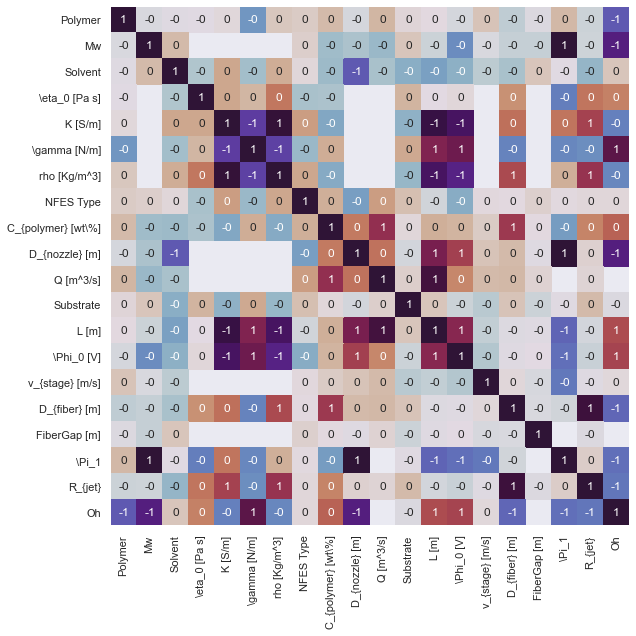

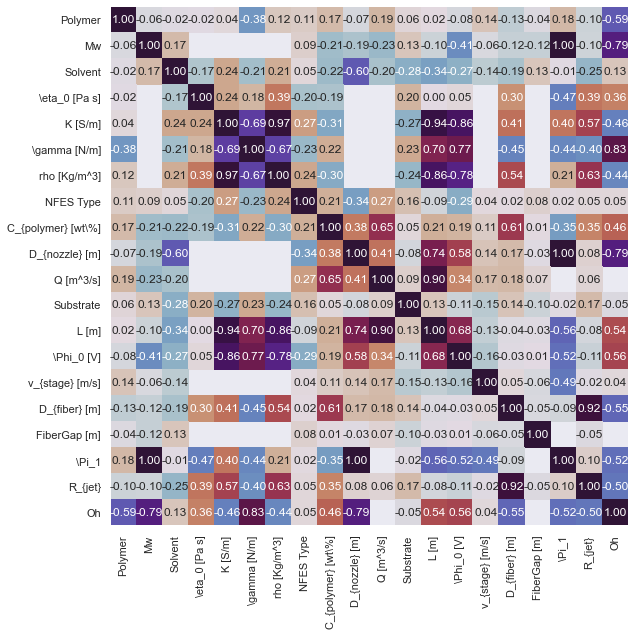

In [9]:
corrMatrix = df_x.drop([
    #"Solvent Surface Tension",
    #"Solvent Dielectric Constant",
    #"Solvent Boiling Point",
    #"Solvent Density",
    #"Solvent Vapour Pressure",
    "FiberMorphology",
    "FiberStructure",
    "Reference"
], axis=1).corr();
scale = 6;

#Digital
ax    = plt.figure(figsize=(1.5*scale, 1.5*scale));
ax    = sns.heatmap(
    corrMatrix,              # provide dataFrame
    annot=True,              # show correlation coefficients
    fmt=".0f",               # correlation coefficients data type
    linewidths=0.0,          # spacing within cells
    cbar=False,              # show colour/coefficient bar
    cmap="twilight_shifted", # colour selection
    center=0.0               # center value
);
plt.tight_layout();
plt.savefig('plt_corMat.png');
plt.show();

#Analog
ax    = plt.figure(figsize=(1.5*scale, 1.5*scale));
ax    = sns.heatmap(
    corrMatrix,              # provide dataFrame
    annot=True,              # show correlation coefficients
    fmt=".2f",               # correlation coefficients data type
    linewidths=0.0,          # spacing within cells
    cbar=False,              # show colour/coefficient bar
    cmap="twilight_shifted", # colour selection
    center=0.0               # center value
);
plt.tight_layout();
plt.savefig('plt_corMat.png');
plt.show();

mpl.rcParams.update(mpl.rcParamsDefault); # Recover matplotlib defaults

---
---

,\Pi_1,Oh,Reference,Reference Colour,Reference Name
15,8.240572e-07,1063.285502,GaofengZheng2010,22,GaofengZheng2010
16,8.240572e-07,698.527628,GaofengZheng2010,22,GaofengZheng2010
17,8.240572e-07,613.473906,GaofengZheng2010,22,GaofengZheng2010
18,8.240572e-07,572.617668,GaofengZheng2010,22,GaofengZheng2010
36,1.140564e-06,171.190201,Cardenas2017,6,Cardenas2017
779,4.953549e-09,2053.380192,Helgeson2007,26,Helgeson2007
780,2.427239e-09,2053.380192,Helgeson2007,26,Helgeson2007
781,3.170272e-08,355.655882,Helgeson2007,26,Helgeson2007
782,3.050338e-08,1154.700111,Helgeson2007,26,Helgeson2007
783,8.811281e-09,950.530327,Helgeson2007,26,Helgeson2007


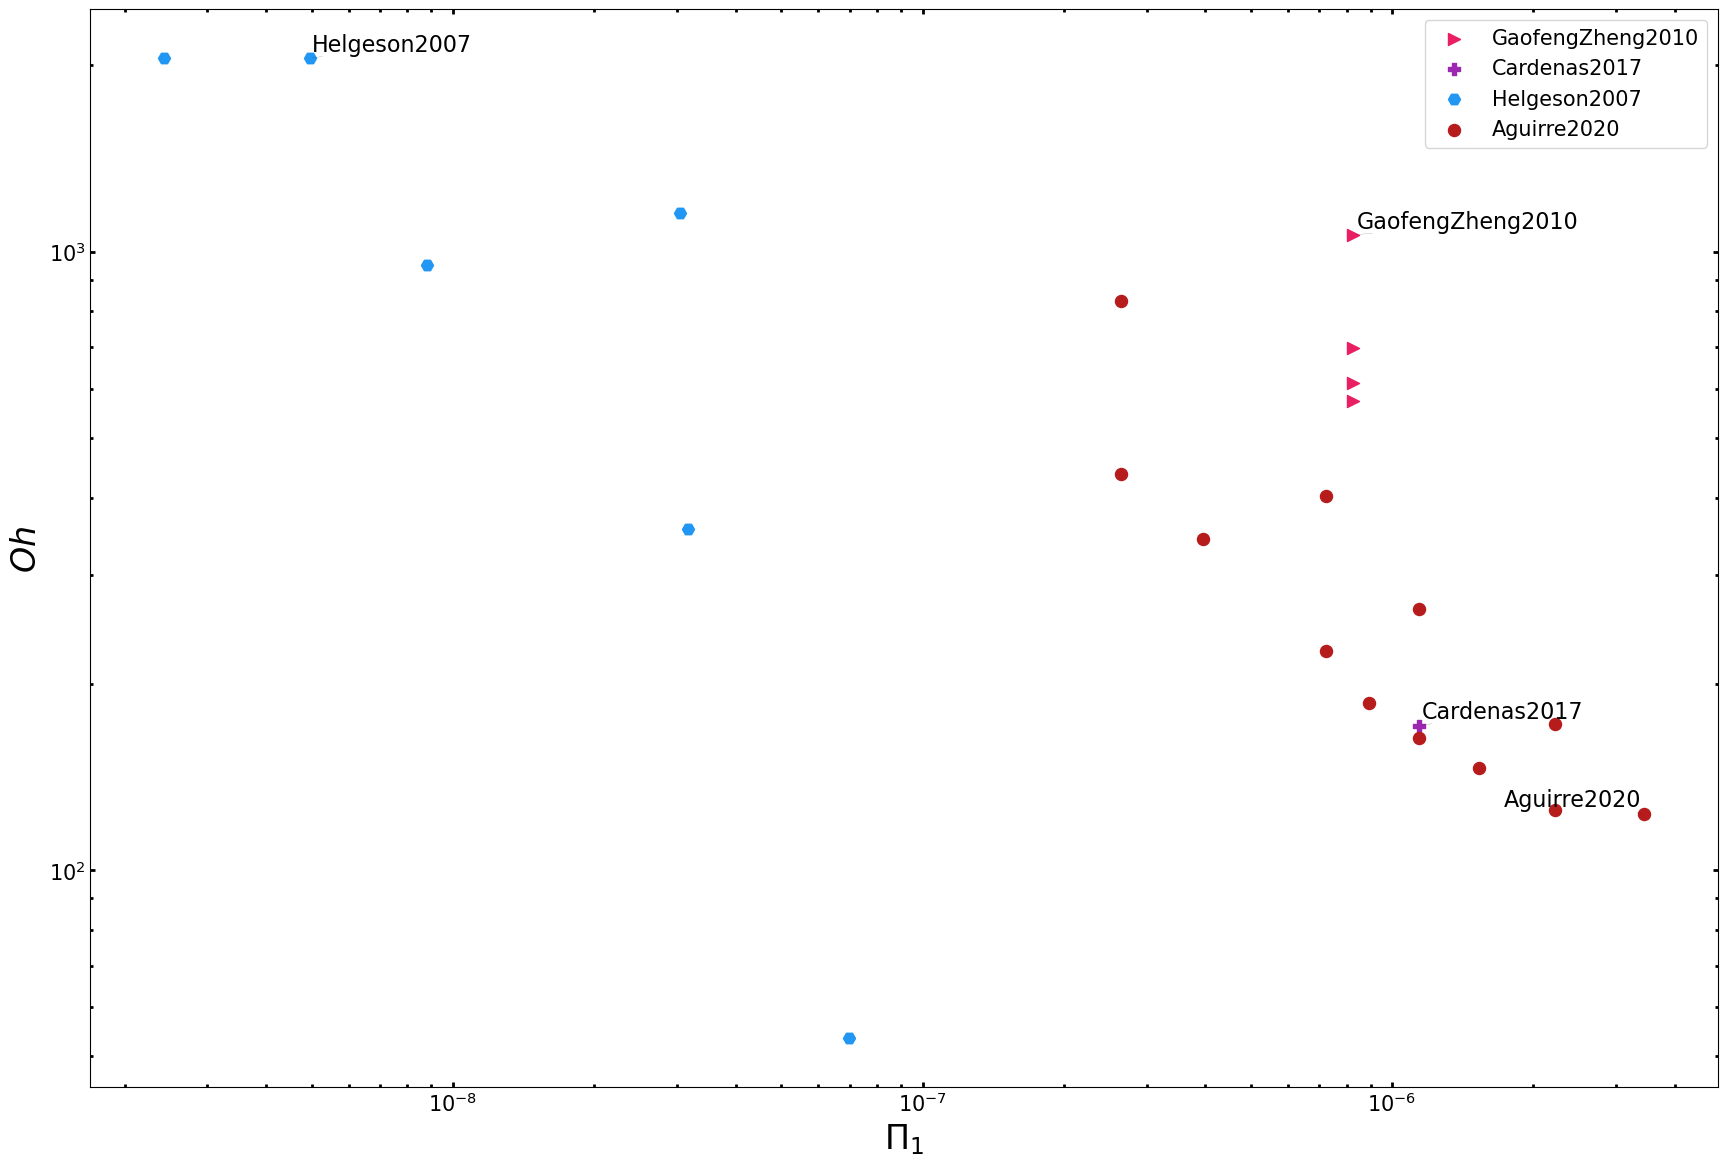

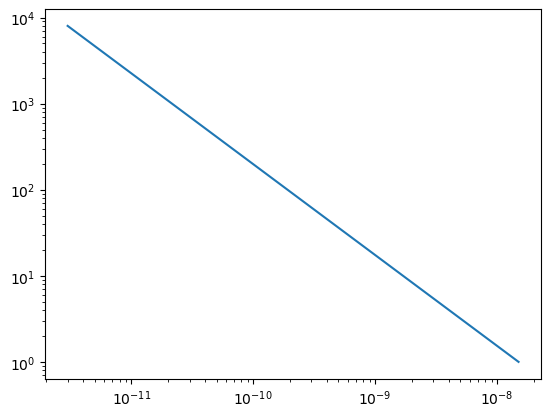

In [75]:
x_str = '\Pi_1';
y_str = 'Oh';
breakXlim = None;
breakYlim = None;
logScale  = True;
refLabels = True;
color_by  = 'Reference';
legPos    = 'best';
scatterPlot_breakAxis(x_str, y_str, refLabels, logScale, df, df_x, color_by, legPos);

#x = np.logspace(-12, -7, 100)
#y = np.logspace(4, 0, 100)
#plt.plot(x, y)

x = np.logspace(np.log10(3e-12), np.log10(1.5e-8), 100)
y = np.logspace(np.log10(8000), np.log10(1), 100)
plt.plot(x, y)

plt.yscale('log');
plt.xscale('log');

,\Phi_0 [V],D_{fiber} [m],Reference,NFES Type Colour,NFES Type Name
0,500.0,5.732000e-08,Song2015,9,xy stage
2,475.0,6.174000e-08,Song2015,9,xy stage
3,475.0,6.811000e-08,Song2015,9,xy stage
4,475.0,6.993000e-08,Song2015,9,xy stage
5,475.0,7.931000e-08,Song2015,9,xy stage
...,...,...,...,...,...
792,200.0,6.988000e-06,Aguirre2020,6,NaN
793,200.0,1.200000e-06,Aguirre2020,6,NaN
794,200.0,2.090000e-06,Aguirre2020,6,NaN
795,200.0,2.160000e-06,Aguirre2020,6,NaN


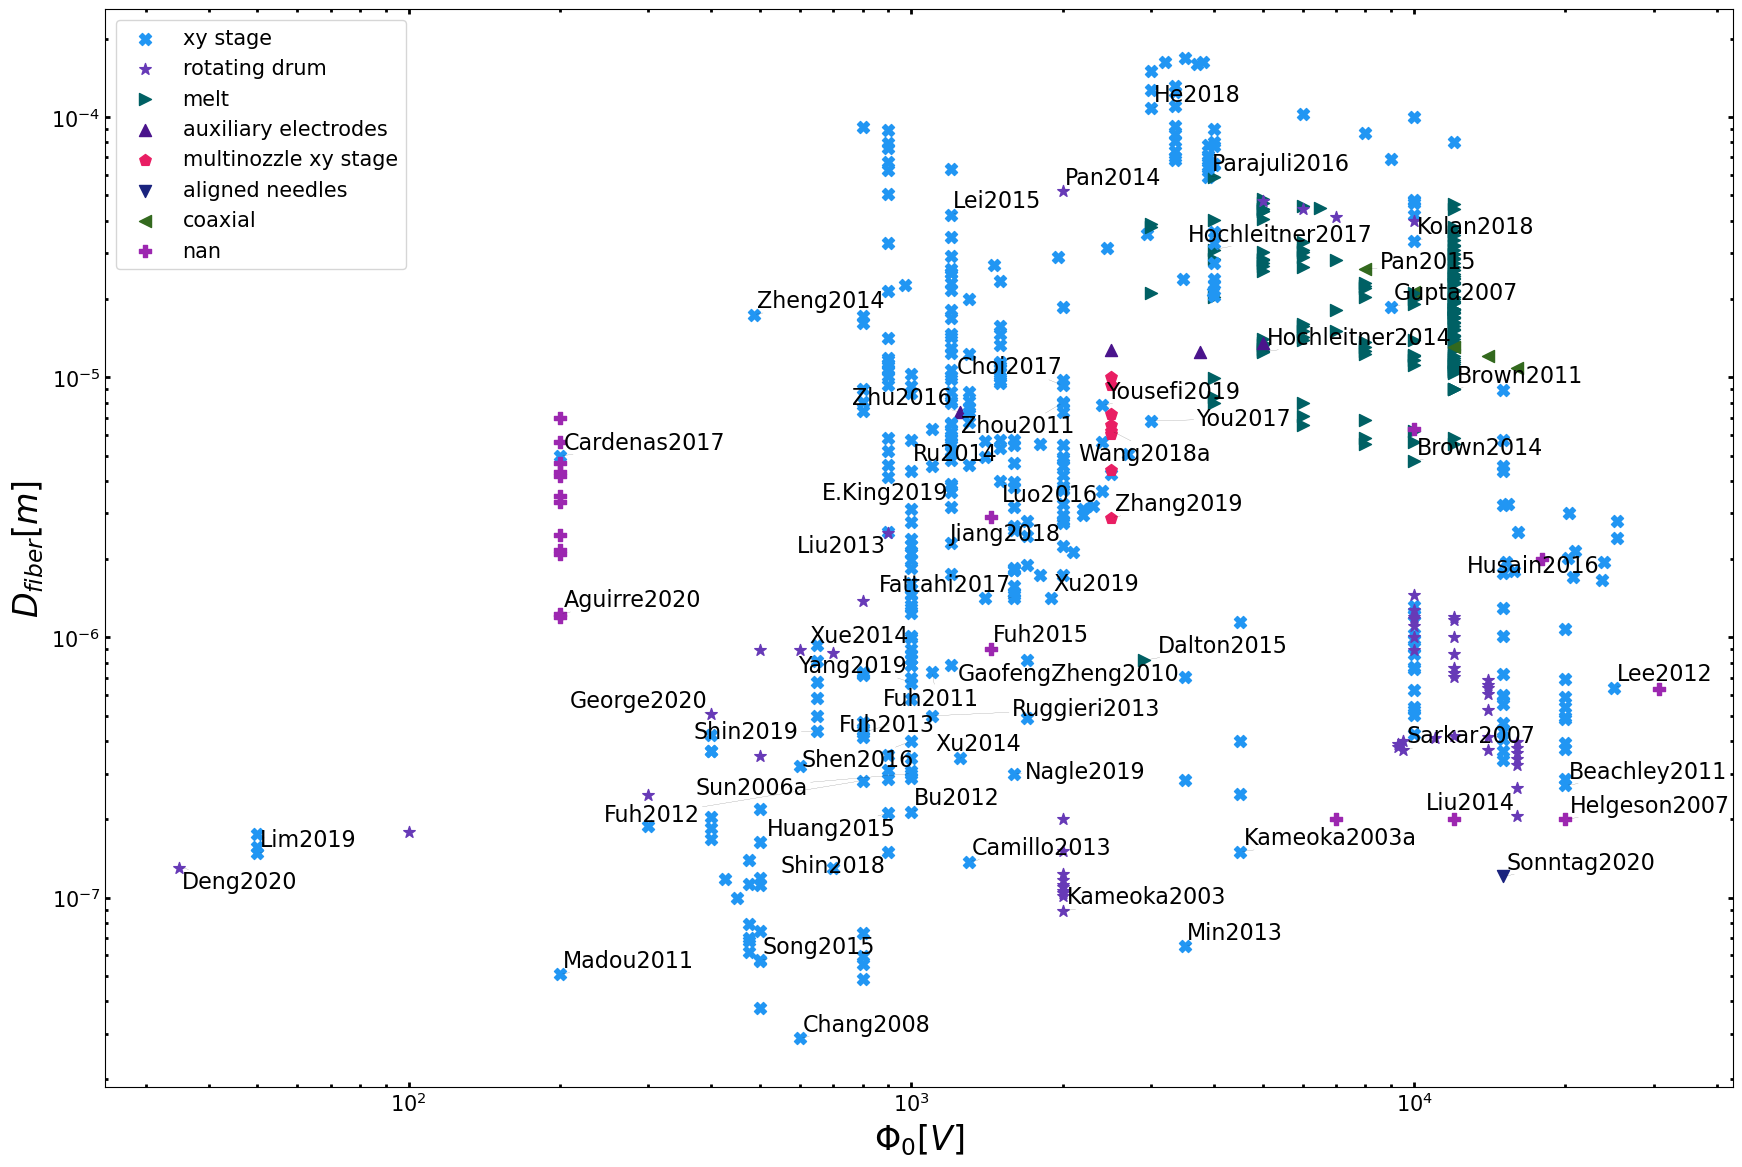

In [76]:
x_str = '\Phi_0 [V]';
y_str = 'D_{fiber} [m]';
breakXlim = None;
breakYlim = None;
logScale  = True;
refLabels = True;
color_by  = 'NFES Type';
legPos    = 'best';
scatterPlot_breakAxis(x_str, y_str, refLabels, logScale, df, df_x, color_by, legPos);

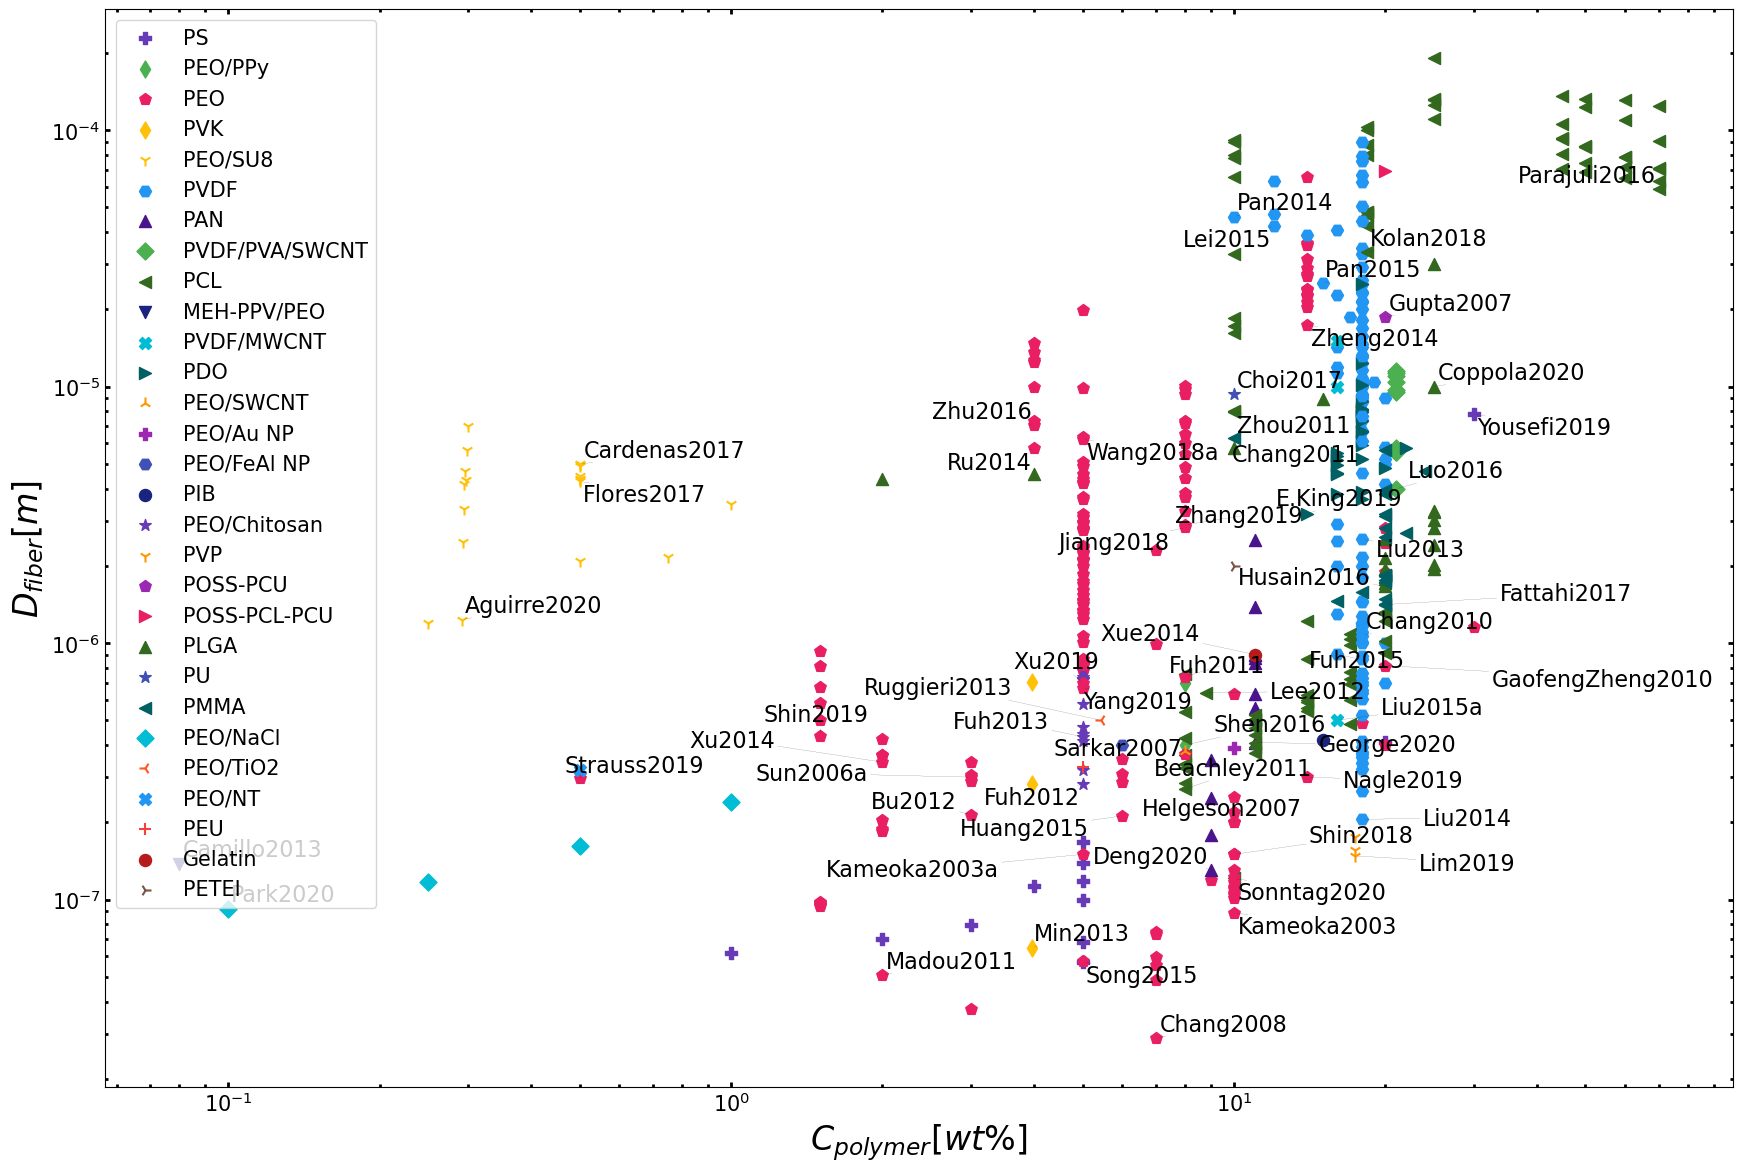

In [12]:
x_str = 'C_{polymer} [wt\%]';
y_str = 'D_{fiber} [m]';
breakXlim = None;
breakYlim = None;
logScale  = True;
refLabels = True;
legPos = 'best';
scatterPlot_breakAxis(x_str, y_str, refLabels, logScale, df, df_x, legPos);

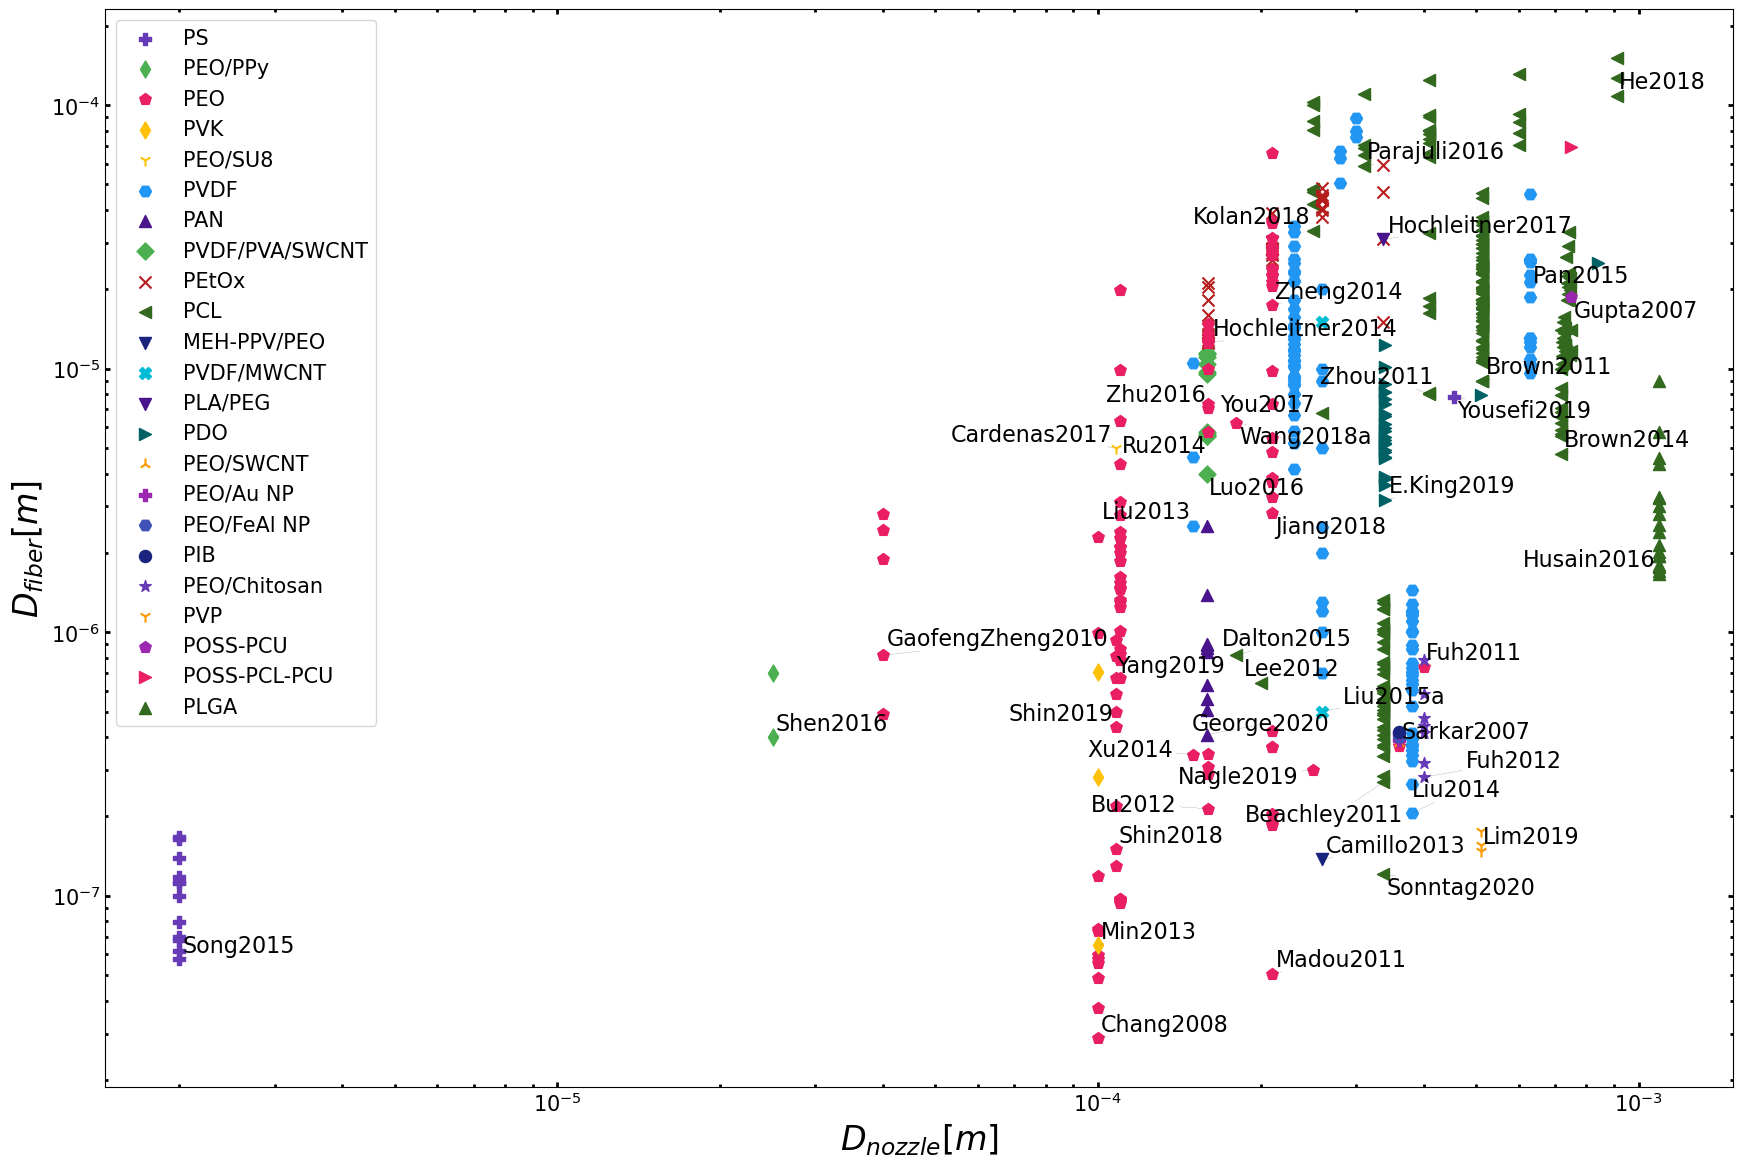

In [13]:
x_str = 'D_{nozzle} [m]';
y_str = 'D_{fiber} [m]';
breakXlim = None;
breakYlim = None;
logScale  = True;
refLabels = True;
legPos = 'best';
scatterPlot_breakAxis(x_str, y_str, refLabels, logScale, df, df_x, legPos);

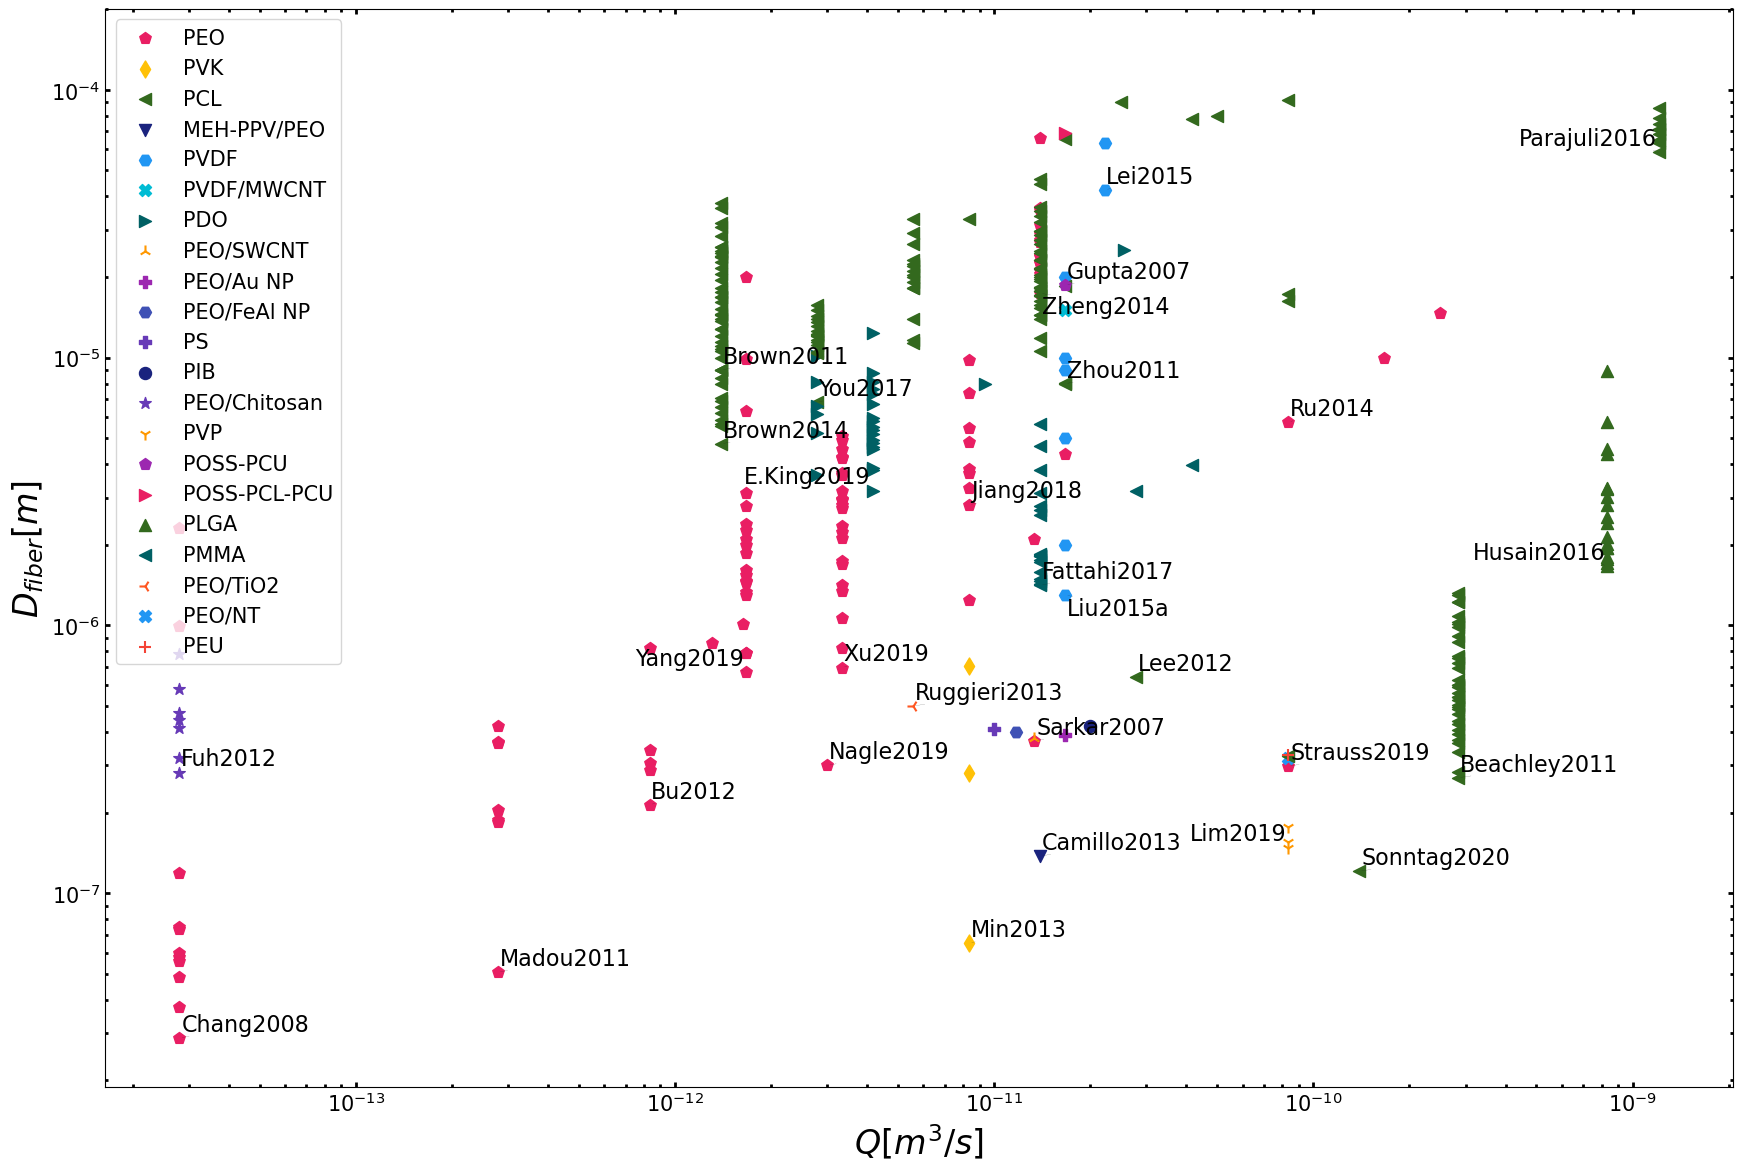

In [14]:
x_str = 'Q [m^3/s]';
y_str = 'D_{fiber} [m]';
breakXlim = None;
breakYlim = None;
logScale  = True;
refLabels = True;
legPos = 'best';
scatterPlot_breakAxis(x_str, y_str, refLabels, logScale, df, df_x, legPos);

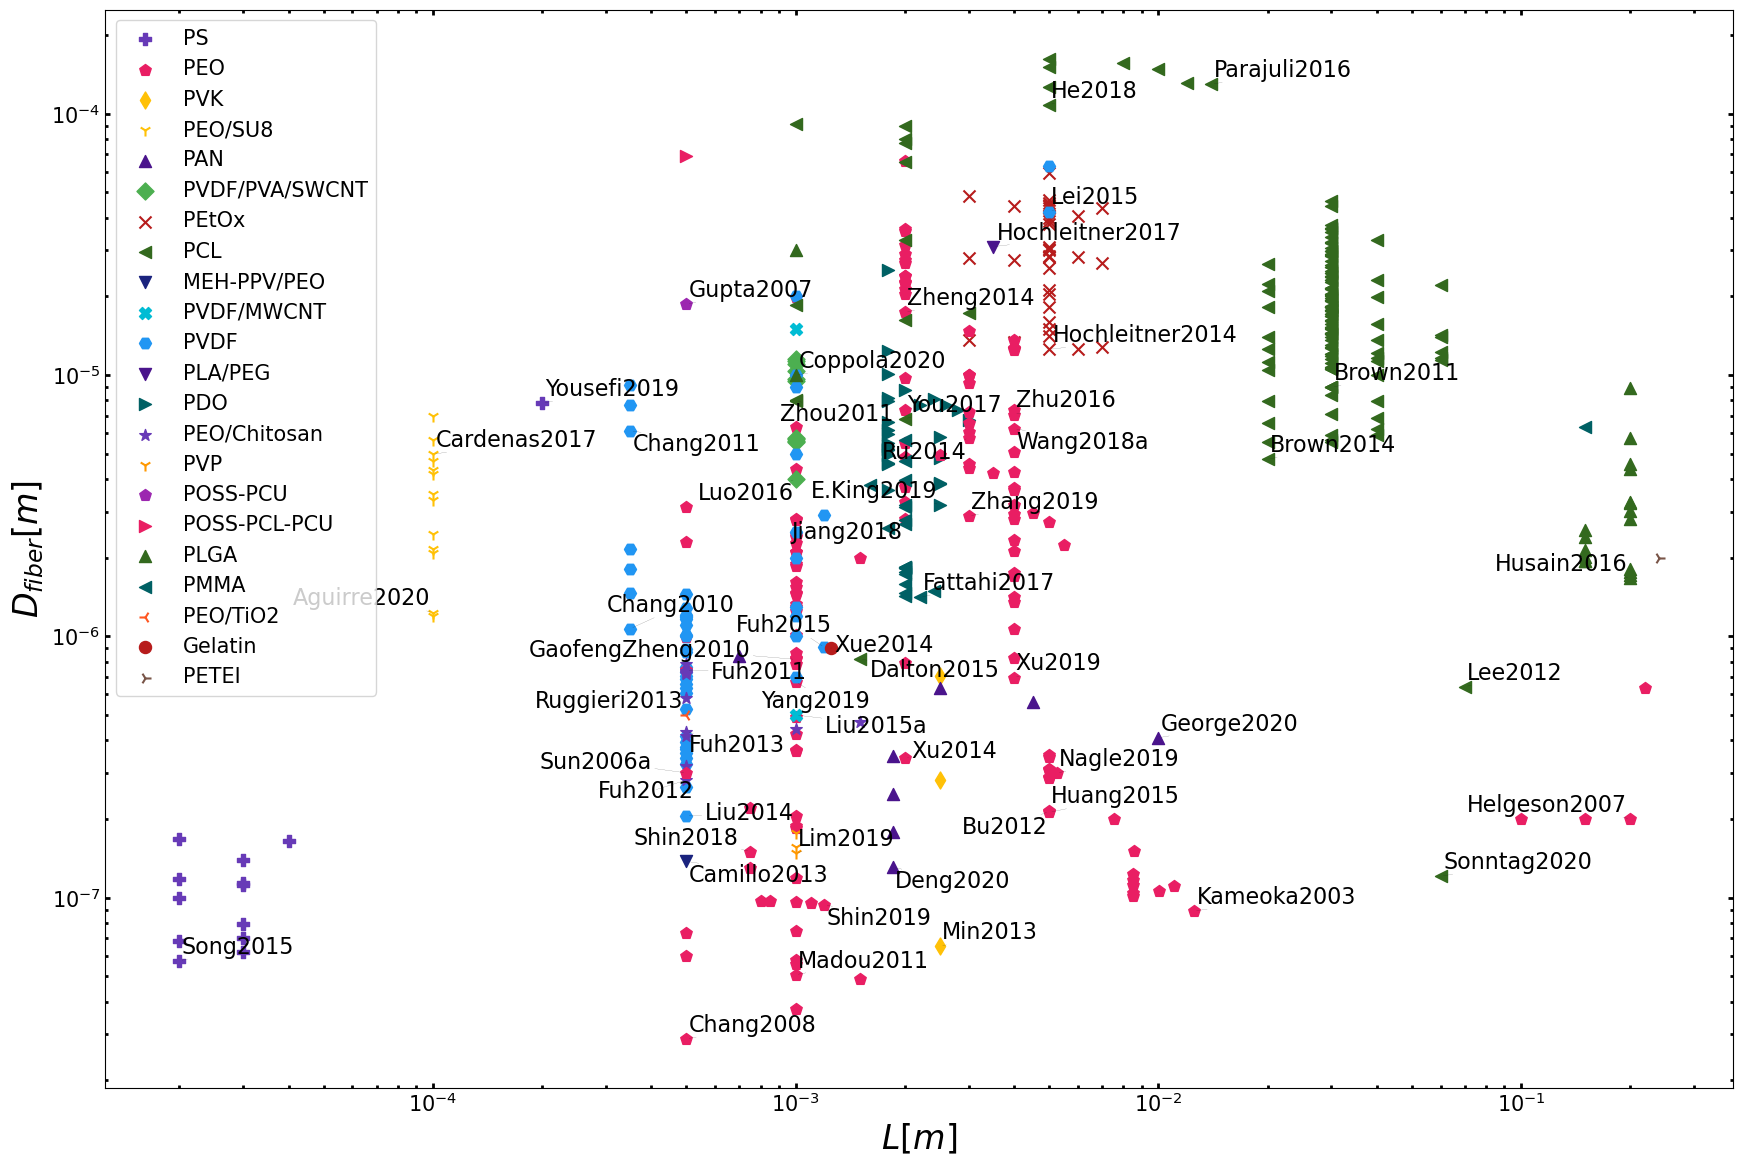

In [15]:
x_str = 'L [m]';
y_str = 'D_{fiber} [m]';
breakXlim = None;
breakYlim = None;
logScale  = True;
refLabels = True;
legPos    = 'best';
scatterPlot_breakAxis(x_str, y_str, refLabels, logScale, df, df_x, legPos);

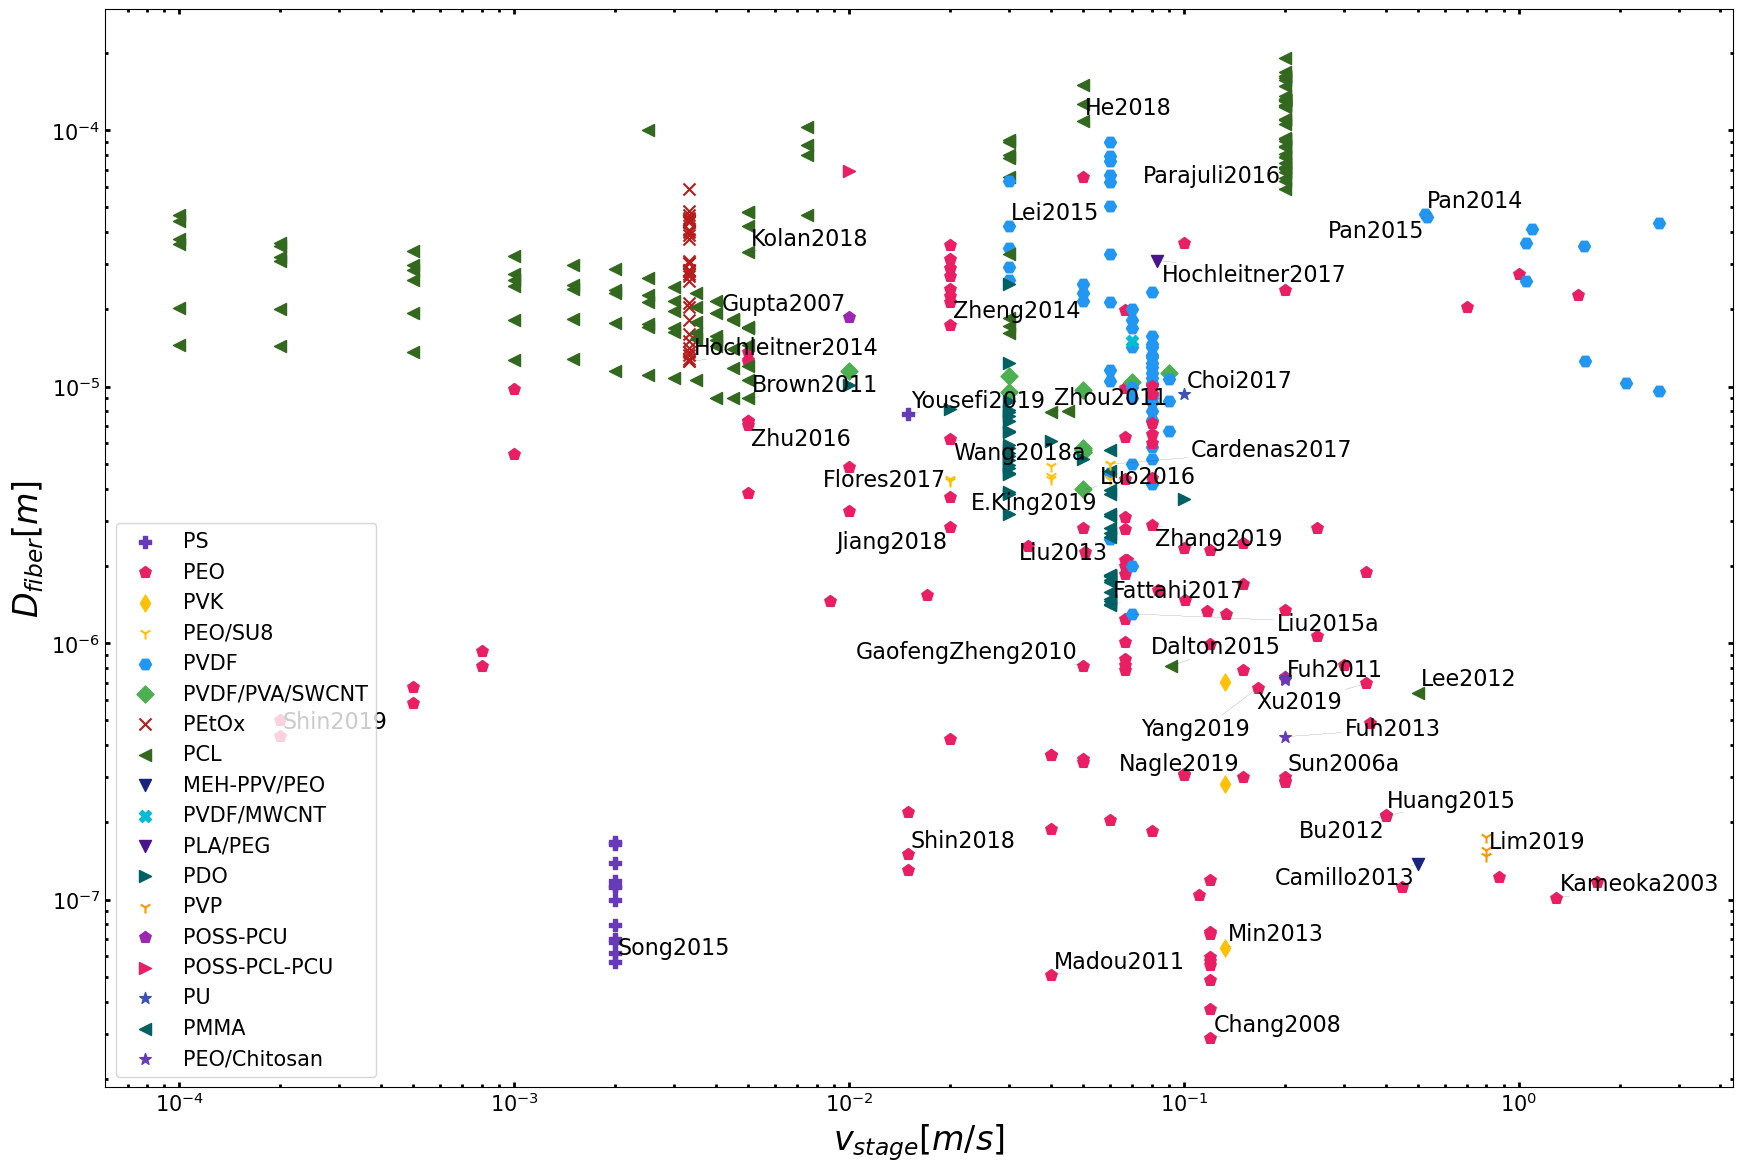

In [16]:
x_str = 'v_{stage} [m/s]';
y_str = 'D_{fiber} [m]';
breakXlim = None;
breakYlim = None;
logScale  = True;
refLabels = True;
legPos    = 'best';
scatterPlot_breakAxis(x_str, y_str, refLabels, logScale, df, df_x, legPos);

---
---

In [17]:
# import pdfkit
# path_wkthmltopdf = r'C:\Program Files\wkhtmltopdf\bin\wkhtmltopdf.exe'
# config = pdfkit.configuration(wkhtmltopdf=path_wkthmltopdf)

# options = {
#     'page-size': 'A4',
#     'margin-top': '0.0in',
#     'margin-right': '0.0in',
#     'margin-bottom': '0.0in',
#     'margin-left': '0.0in',
#     'encoding': "UTF-8",
#     'custom-header' : [
#         ('Accept-Encoding', 'gzip')
#     ],
#     'cookie': [
#         ('cookie-name1', 'cookie-value1'),
#         ('cookie-name2', 'cookie-value2'),
#     ],
#     'no-outline': None,
#     'orientation': 'Landscape'
# }

# pdfkit.from_file('./NFES_ReviewPaper.html','NFES_ReviewPaper.pdf', configuration=config, options=options)